In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [26]:
# Read data from text files
file_paths = ["~/Desktop/Vinay/ATBC2023/00_data/*_combined_{}.0.txt".format(i, j) for i in range(1, 397) for j in range(1, 6)]
data_list = [pd.read_table(file_paths, header=None) for file_path in file_paths]



ValueError: Invalid file path or buffer object type: <class 'list'>

In [18]:
# Select the first two columns and add additional information
combined = pd.concat([df.iloc[:, :2].assign(Mountain=file_path.split('/')[-3],
                                             Species=file_path.split('/')[-2],
                                             FileName=file_path.split('/')[-1])
                      for df, file_path in zip(data_list, file_paths)])

# Rename columns
combined.columns = ["Ya", "Ne", "Mountain", "Species", "FileName"]

# Add more columns
combined["Sample"] = combined["FileName"].str.extract(r"(.*?_.*?)_.*")
combined["Run"] = combined["FileName"].str.extract(r".*?_(\d+)\..*")



NameError: name 'data_list' is not defined

In [19]:
# Perform data transformations and manipulations
combined.loc[combined["Species"] == "NC", "Species"] = "NLT"
combined.loc[combined["Species"] == "NS", "Species"] = "RBS"
combined["Species"] = combined["Species"].str.replace("_PAL", "")
combined["Habitat"] = "Forest"
combined.loc[combined["Species"].str.contains("NP|PP|BTG"), "Habitat"] = "Grassland"
combined.loc[combined["Species"].str.contains("YBB"), "Habitat"] = "Forest Generalist"
combined.loc[combined["Species"].str.contains("NLT|PLT|BLT|ALT|RBS|WBS|BOF"), "Habitat"] = "Forest Specialists"
combined.loc[combined["Species"].str.contains("NP"), "Habitat"] = "Grassland Specialist"
combined.loc[combined["Species"].str.contains("BTG|PP"), "Habitat"] = "Grassland Generalist"
combined["Site.Species"] = combined["Mountain"] + "." + combined["Species"]
combined["Site.Species"] = combined["Site.Species"].str.replace("Nilgiris", "N").str.replace("Palani_Anamalai", "P").str.replace("Banasura", "B").str.replace("Ashambu", "A")

NameError: name 'combined' is not defined

NameError: name 'combined' is not defined

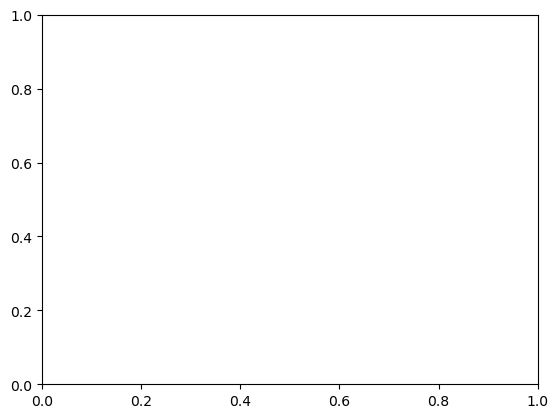

In [20]:
# Plotting using matplotlib
fig, ax = plt.subplots()
colors = ["#3283FE", "#325A9B", "#3E9FB3", "#0F8299", "#FEAF16", "#FBE426", "#1C8356", "#1CBE4F",
          "#5A5156", "#E4E1E3", "#DEA0FD", "#D85FF7", "#C4451C", "#85660D", "#F8A19F", "#F6222E"]
for species, data in combined.groupby("Site.Species"):
    ax.plot(data["Ya"] / 1000, data["Ne"], label=species, color=colors.pop(0))

# Customize the plot
ax.set_xscale("log")
ax.set_xlabel("Years ago * 10^3")
ax.set_ylabel("Effective Population Size (* 10^4)")
ax.set_title("Demographic history: Habitat generalists and specialists")
ax.legend()

plt.show()